## Latent Dirichlet Allocation (LDA)

In [1]:
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
import gensim
from gensim import corpora

#Times of India - June 22
doc1 = "Poised for the next phase of development, the Indian Institute of Management-Visakhapatnam (IIM-V) is set to launch executive management programmes for experienced professionals. On a pilot basis, IIM-V will roll out a 15-month postgraduate certificate programme in business management for the experienced professionals (PGCEP) from September after conducting a briefing session at the end of June for registered applicants."

#Times of India - Mar 15
doc2 = "The Indian Institute of Management-Visakhapatnam (IIM-V) has managed to achieve 100% placements for a second year in a row, in further indication of a growing demand for talent emerging from the country's premier business schools. Due to a strong performance of students in summer internship and corporate competitions, about 18% of the students received pre-placement offers/interviews."

#https://www.yovizag.com/iim-visakhapatnam-partners-iim-bengaluru-womens-start-boost/
doc3 = "A ground breaking venture that will no doubt have a long run positive impact, the partnership is aimed at facilitating a trained and prepared new generation of women entrepreneurs. Start up businesses and ventures is the target of IIM Visakhapatnam and IIM Bengaluru collaborating for a focused online and classroom training programme."

#The Hindu - June 15
doc4 = "The FIFA World Cup 2018 is off to a flying start with Russia bagging five goals against Saudi Arabia. While fans will find a way to connect for 'bigger' fixtures, it's rather surprising not a single hotel or bar is trying to ride on the World Cup fever in the city."

#Indian express June 22
doc5 = "Argentina's humiliating 0-3 defeat to Croatia in a Group D match of the FIFA World Cup has left the team's supporters across the world in a state of shock. Soon after the loss, Argentinian supporters on social media vented their ire against the team's 'lackluster' attitude during the match. And they spared no one, including captain and star player Lionel Messi."

#Economic times June 25
doc6 ="As a series of scams, frauds and boardroom battles continue to rock India Inc, top business schools in the country are stepping up their focus on ethics and governance in their programmes, to help shape a generation of right-minded business leaders."

#The hindu June 24
doc7 = "That is bad news for Argentina, which needs to beat Nigeria in St. Petersburg and hope that Croatia avoids a loss against Iceland in Rostov in games that are being played simultaneously. Croatia is already guaranteed a place in the last 16 after two wins, while Argentina and Iceland are tied on one point."


doc_complete = [doc1, doc2, doc3, doc4, doc5, doc6, doc7]

C:\WORK\Software\Anaconda\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string, re
stop = set(stopwords.words('english'))
exclude = string.punctuation 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free =  stop_free.translate(str.maketrans(exclude,' '*len(exclude))) # Remove punctuation
    clean_txt = " ".join(re.sub("^\d+\.?\d*", "", nt) for nt in punc_free.split())# remove numbers
    clean_txt = re.sub(r'\b\w{1,2}\s+\b', ' ', clean_txt)# remove words with one or two chars
    normalized = " ".join(lemma.lemmatize(word) for word in clean_txt.split())
    return normalized

doc_clean = [clean(doc).split() for doc in doc_complete] 

In [3]:
print("Orginal version of first doc:",doc_complete[0])
print("\nCleaned version:",doc_clean[0])

Orginal version of first doc: Poised for the next phase of development, the Indian Institute of Management-Visakhapatnam (IIM-V) is set to launch executive management programmes for experienced professionals. On a pilot basis, IIM-V will roll out a 15-month postgraduate certificate programme in business management for the experienced professionals (PGCEP) from September after conducting a briefing session at the end of June for registered applicants.

Cleaned version: ['poised', 'next', 'phase', 'development', 'indian', 'institute', 'management', 'visakhapatnam', 'iim', 'set', 'launch', 'executive', 'management', 'programme', 'experienced', 'professional', 'pilot', 'basis', 'iim', 'roll', 'month', 'postgraduate', 'certificate', 'programme', 'business', 'management', 'experienced', 'professional', 'pgcep', 'september', 'conducting', 'briefing', 'session', 'end', 'june', 'registered', 'applicant']


In [4]:
dictionary = gensim.corpora.Dictionary(doc_clean)
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
print(dictionary[23], dictionary[24])
print("doc1:",doc_term_matrix[0])

professional programme
doc1: [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 3), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1)]


In [5]:
#dictionary = gensim.corpora.Dictionary(texts)
#corpus = [dictionary.doc2bow(doc) for doc in texts]
Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(doc_term_matrix, num_topics=3, id2word = dictionary, passes=50, random_state=1)
ldamodel.print_topics()

[(0,
  '0.016*"argentina" + 0.016*"croatia" + 0.016*"cup" + 0.016*"student" + 0.016*"placement" + 0.016*"iceland" + 0.016*"world" + 0.009*"school" + 0.009*"country" + 0.009*"loss"'),
 (1,
  '0.026*"iim" + 0.026*"venture" + 0.015*"visakhapatnam" + 0.015*"generation" + 0.015*"start" + 0.015*"business" + 0.015*"breaking" + 0.015*"classroom" + 0.015*"bengaluru" + 0.015*"training"'),
 (2,
  '0.021*"management" + 0.021*"business" + 0.021*"programme" + 0.015*"world" + 0.015*"professional" + 0.015*"experienced" + 0.015*"team" + 0.015*"match" + 0.015*"supporter" + 0.015*"iim"')]

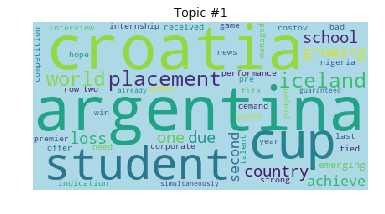

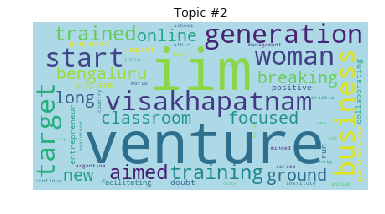

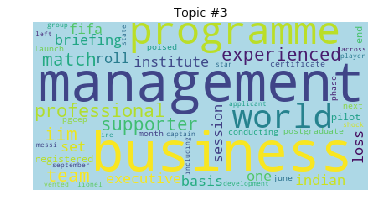

In [6]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

for t in range(ldamodel.num_topics):
    plt.figure()
    plt.imshow(WordCloud(background_color="lightblue").fit_words(dict(ldamodel.show_topic(t, 50))))
    plt.axis("off")
    plt.title("Topic #" + str(t+1))
    plt.show()

In [7]:
lda_corpus  = ldamodel[doc_term_matrix]
print(doc_complete[0])
print(lda_corpus[0])

Poised for the next phase of development, the Indian Institute of Management-Visakhapatnam (IIM-V) is set to launch executive management programmes for experienced professionals. On a pilot basis, IIM-V will roll out a 15-month postgraduate certificate programme in business management for the experienced professionals (PGCEP) from September after conducting a briefing session at the end of June for registered applicants.
[(2, 0.98190147)]


In [8]:
print(doc_complete[3])
print(lda_corpus[3])

The FIFA World Cup 2018 is off to a flying start with Russia bagging five goals against Saudi Arabia. While fans will find a way to connect for 'bigger' fixtures, it's rather surprising not a single hotel or bar is trying to ride on the World Cup fever in the city.
[(0, 0.97651297), (1, 0.011708678), (2, 0.011778344)]


In [10]:
print("Current alpha =", ldamodel.alpha)
#Parameter selection
# alpha = (Number of topics per doc)/(Total number of topics)
ldamodel2 = Lda(doc_term_matrix, num_topics=3, id2word = dictionary, passes=50, random_state=1, alpha=0.6)
print("Model2 alpha =", ldamodel2.alpha)

lda_corpus2  = ldamodel2[doc_term_matrix]
for doc in lda_corpus2:
    print(doc)

Current alpha = [0.33333334 0.33333334 0.33333334]
Model2 alpha = [0.6 0.6 0.6]
[(0, 0.016610418), (1, 0.017188437), (2, 0.9662012)]
[(0, 0.9606384), (1, 0.018861981), (2, 0.020499576)]
[(0, 0.018980384), (1, 0.96106285), (2, 0.019956756)]
[(0, 0.95724034), (1, 0.021205408), (2, 0.02155428)]
[(0, 0.018852903), (1, 0.016339239), (2, 0.9648079)]
[(0, 0.023761343), (1, 0.024389647), (2, 0.951849)]
[(0, 0.9578067), (1, 0.020695055), (2, 0.02149825)]


In [11]:
#Parameter selection
# beta or eta = (Number of words per doc.) / (Total number of words in vocabulary)
print('No of words = ', len(dictionary))
print("First topic")
print(ldamodel.print_topics()[2])
print("Model eta =", ldamodel.eta[0])

ldamodel3 = Lda(doc_term_matrix, num_topics=3, id2word = dictionary, passes=50, random_state=1, alpha=0.1,eta=0.02)
print("\nModel 3 eta =", ldamodel3.eta[0])
print(ldamodel3.print_topics()[2])
ldamodel4 = Lda(doc_term_matrix, num_topics=3, id2word = dictionary, passes=50, random_state=1, alpha=0.1,eta=.7)
print("\nModel 4 eta =", ldamodel4.eta[0])
print(ldamodel4.print_topics()[2])

No of words =  176
First topic
(2, '0.021*"management" + 0.021*"business" + 0.021*"programme" + 0.015*"world" + 0.015*"professional" + 0.015*"experienced" + 0.015*"team" + 0.015*"match" + 0.015*"supporter" + 0.015*"iim"')
Model eta = 0.33333334

Model 3 eta = 0.02
(2, '0.030*"business" + 0.030*"management" + 0.030*"programme" + 0.020*"experienced" + 0.020*"professional" + 0.020*"world" + 0.020*"match" + 0.020*"team" + 0.020*"supporter" + 0.020*"iim"')

Model 4 eta = 0.7
(2, '0.017*"business" + 0.017*"programme" + 0.017*"management" + 0.012*"iim" + 0.012*"world" + 0.012*"professional" + 0.012*"experienced" + 0.012*"team" + 0.012*"match" + 0.012*"supporter"')
